# Why magnesium is not brittle: a quantitative study on the accommodation of deformation incompatibility



## Companion python jupyter notebook for interactive data visualization and exploration

This notebook is made available to facilitate the visualization and exploration of the HRDIC data in the manuscript "Why magnesium is not brittle: a quantitative study on the accommodation of deformation incompatibility", submitted to Acta Materialia in March 2017. 

The dataset can be downloaded from [Zenodo](http://doi.org/10.5281/zenodo.345313) as either a [text file](https://zenodo.org/record/345313/files/AZ31.txt) or a [NumPy binary file](https://zenodo.org/record/345313/files/AZ31.npy).

This notebook uses a helper module called hrdic_analysis_short.py which can be downloaded from the same GitHub repository. In addition the notebook requires `numpy` and `matplotlib`. This notebook was created using `python 3.5.0` `numpy 1.11.3` and `matplotlib 2.0.0` and it worked well when we used it.

### Loading data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hrdic_analysis_short as hrdic
from ipywidgets import interact, interactive, fixed
%matplotlib notebook

The dataset is loaded with the command `hrdic.DeformationMapFast` which requires a data directory and filename as inputs. Below we have used `'./'` for current directory and the name of the datafile in Zenodo. The datafile is available as a text file ([AZ31.txt](https://zenodo.org/record/345313/files/AZ31.txt)) or a NumpPy binary file ([AZ31.npy](https://zenodo.org/record/345313/files/AZ31.npy)). The `'.npy'` file loads faster but there is also an alternative function for reading the `'.txt'` file instead. 

In [2]:
#using the .txt is much slower than the binary .npy
#def_map=hrdic.DeformationMap('./','AZ31.txt')
def_map=hrdic.DeformationMapFast('./','AZ31.npy')

The edges of the map can be cropped to remove edge artifacts:

In [3]:
du11_cropped= def_map.du11[220:-10,30:-175]
du22_cropped= def_map.du22[220:-10,30:-175]
max_shear_cropped= def_map.max_shear[220:-10,30:-175]

### Interactive visualization

<IPython.core.display.Javascript object>


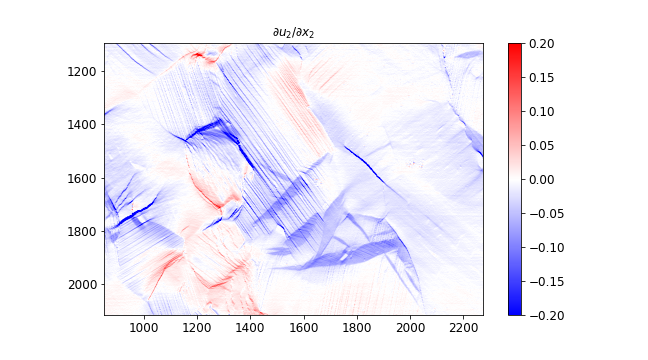

In [4]:
f,ax=plt.subplots(1,1,figsize=(9,5))
image_map=ax.imshow(du11_cropped,
                    vmin=0,
                    vmax=0.09,
                    cmap='viridis',
                    interpolation='bilinear')
plt.colorbar(image_map);

The interactive view of the displacement gradient components:

In [7]:
interactive(hrdic.scrub, fig=fixed(image_map), fmap=fixed(def_map),
            component=('du11','du22','du12','du21','Max shear'),
            colourmap= ('viridis','bwr'),
            cmin=(-0.5,1.9,0.01),
            cmax=(0.0,2.0,0.01))